In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [35]:
df = pd.read_csv("StudentsPerformance.csv")

In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [39]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [40]:
df[df.dtypes[df.dtypes == 'object' ].index]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [41]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [42]:
df.dtypes=='int'

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                      True
reading score                   True
writing score                   True
dtype: bool

In [43]:
df.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

In [44]:
numerical_value = df.select_dtypes(exclude="object")

In [45]:
df[df.dtypes[df.dtypes == 'object' ].index]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [46]:
df[df.dtypes[df.dtypes == 'int' ].index]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


<Axes: xlabel='math score'>

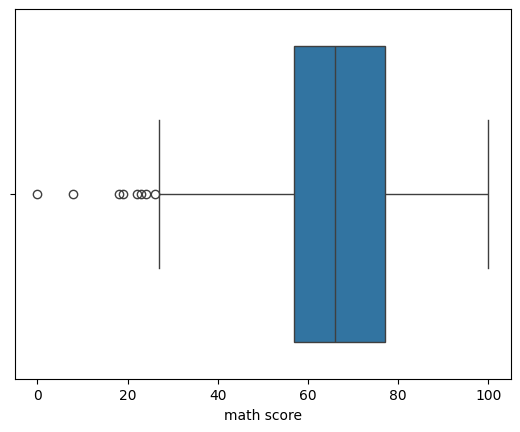

In [47]:
sns.boxplot(x="math score",data=df)

<Axes: xlabel='reading score'>

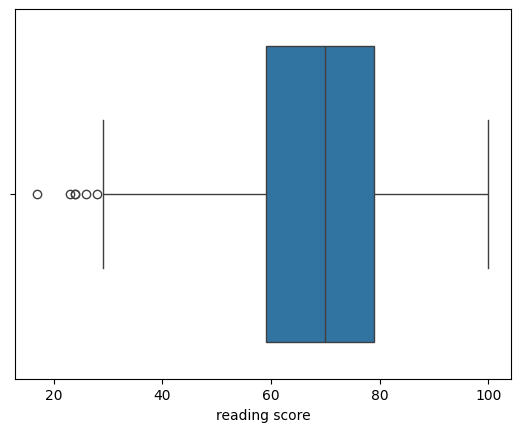

In [48]:
sns.boxplot(x="reading score",data=df)

<Axes: xlabel='writing score'>

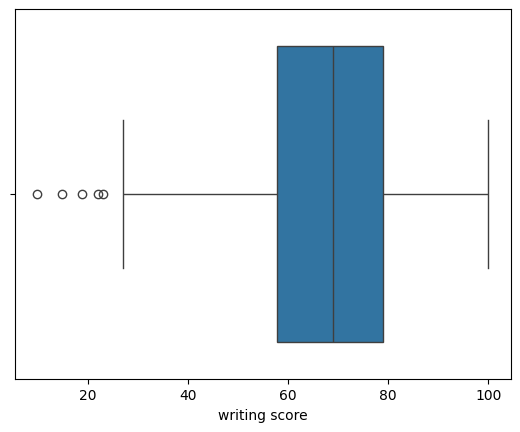

In [49]:
sns.boxplot(x="writing score",data=df)

In [50]:
df = df[df['math score']< df['math score'].quantile(0.99)]
df = df[df['reading score']< df['reading score'].quantile(0.99)]
df = df[df['writing score']< df['writing score'].quantile(0.99)]


<Axes: xlabel='math score'>

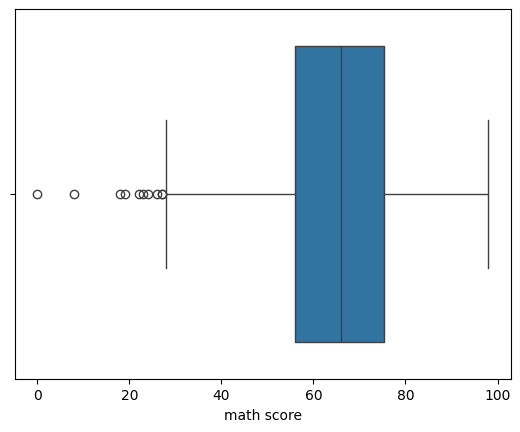

In [51]:
sns.boxplot(x="math score",data=df)

<Axes: xlabel='reading score'>

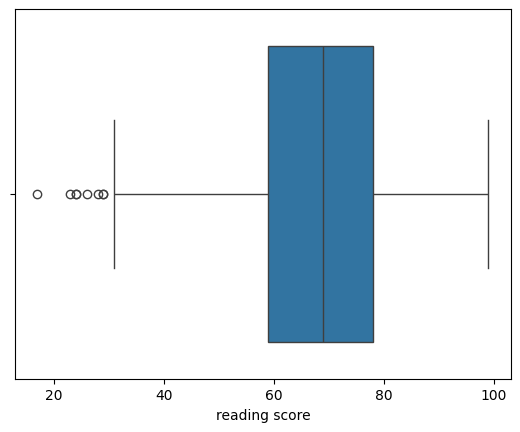

In [52]:
sns.boxplot(x="reading score",data=df)

<Axes: xlabel='writing score'>

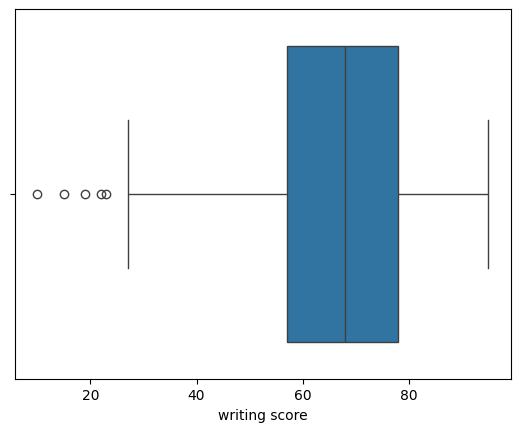

In [53]:
sns.boxplot(x="writing score",data=df)

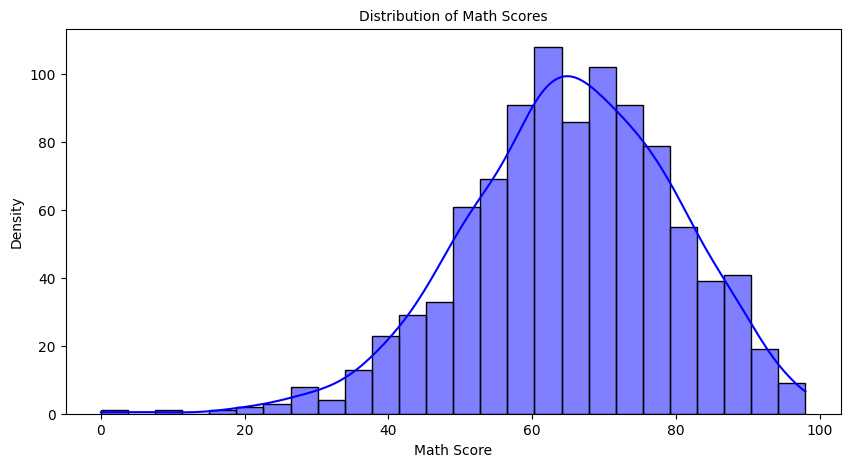

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(df['math score'], color="blue", kde=True)
plt.title('Distribution of Math Scores', fontsize=10)
plt.xlabel('Math Score', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

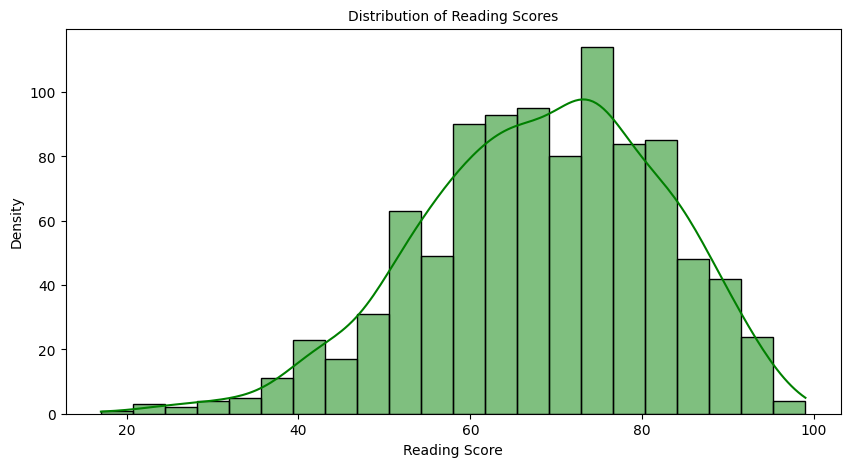

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(df['reading score'], color="green", kde=True)
plt.title('Distribution of Reading Scores', fontsize=10)
plt.xlabel('Reading Score', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

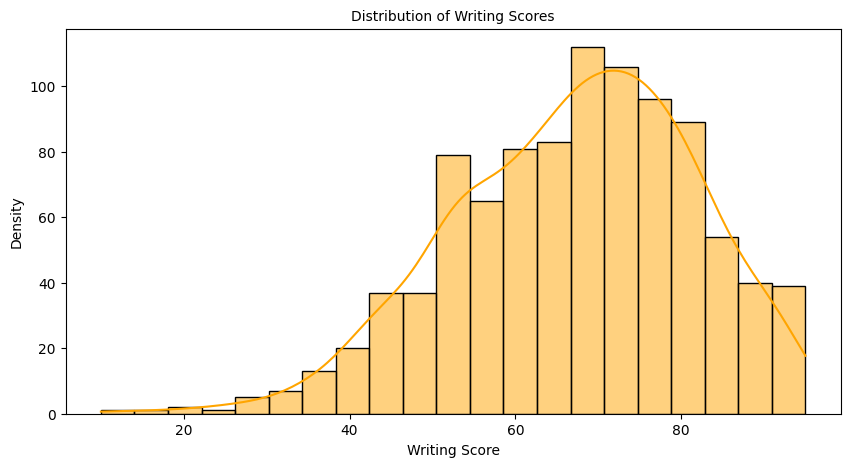

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(df['writing score'], color="orange", kde=True)
plt.title('Distribution of Writing Scores', fontsize=10)
plt.xlabel('Writing Score', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

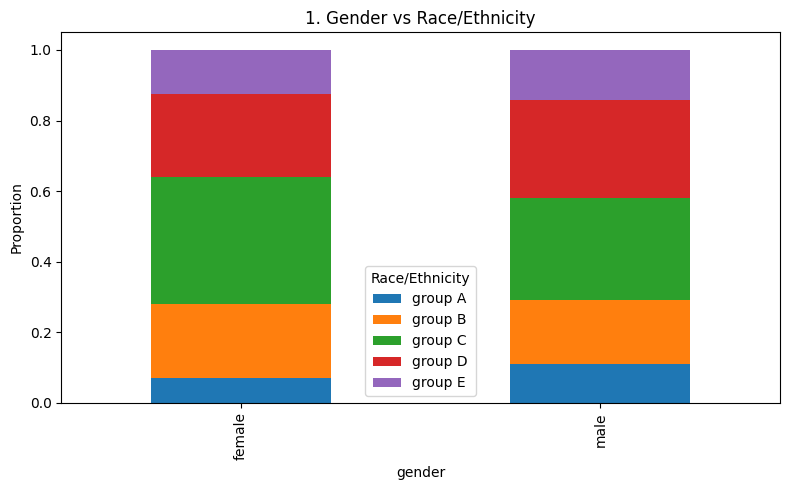

In [57]:
ct = pd.crosstab(df['gender'], df['race/ethnicity'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('1. Gender vs Race/Ethnicity')
plt.ylabel('Proportion')
plt.legend(title='Race/Ethnicity')
plt.tight_layout()
plt.show()

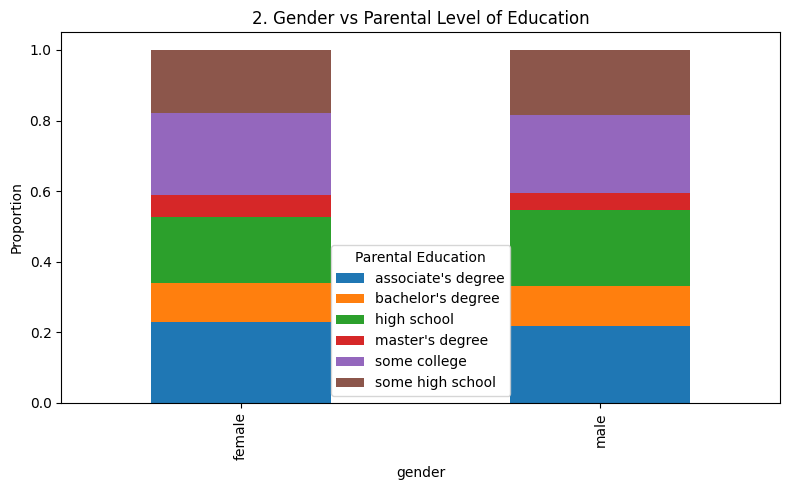

In [58]:
ct = pd.crosstab(df['gender'], df['parental level of education'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('2. Gender vs Parental Level of Education')
plt.ylabel('Proportion')
plt.legend(title='Parental Education')
plt.tight_layout()
plt.show()

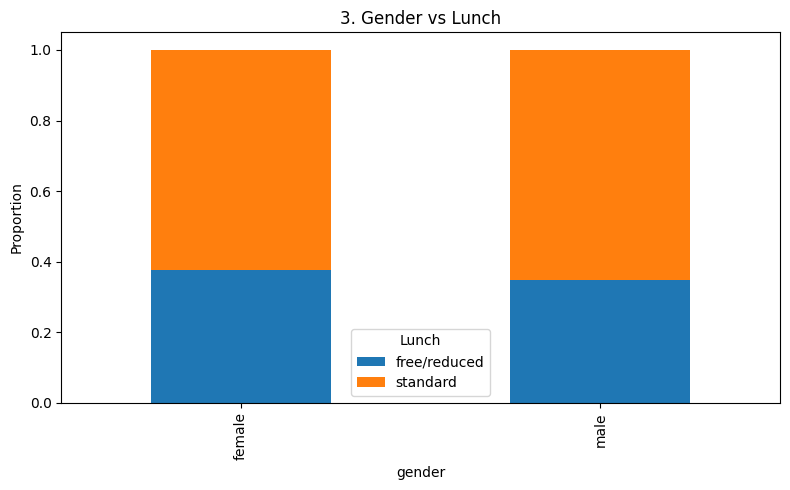

In [59]:
ct = pd.crosstab(df['gender'], df['lunch'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('3. Gender vs Lunch')
plt.ylabel('Proportion')
plt.legend(title='Lunch')
plt.tight_layout()
plt.show()

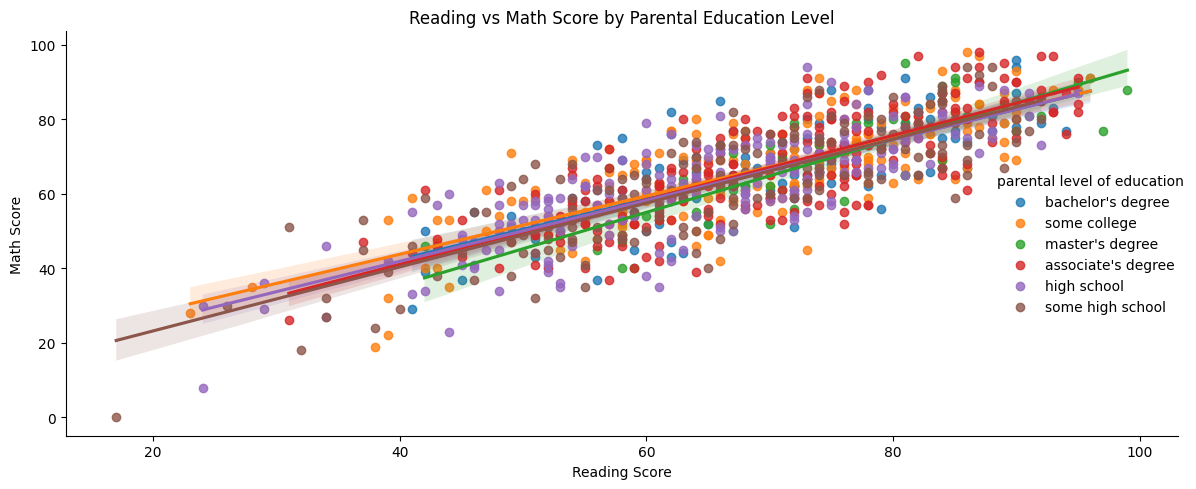

In [71]:
sns.lmplot(x='reading score', y='math score', hue='parental level of education', data=df, height=5, aspect=2)
plt.title('Reading vs Math Score by Parental Education Level')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.tight_layout()
plt.show()


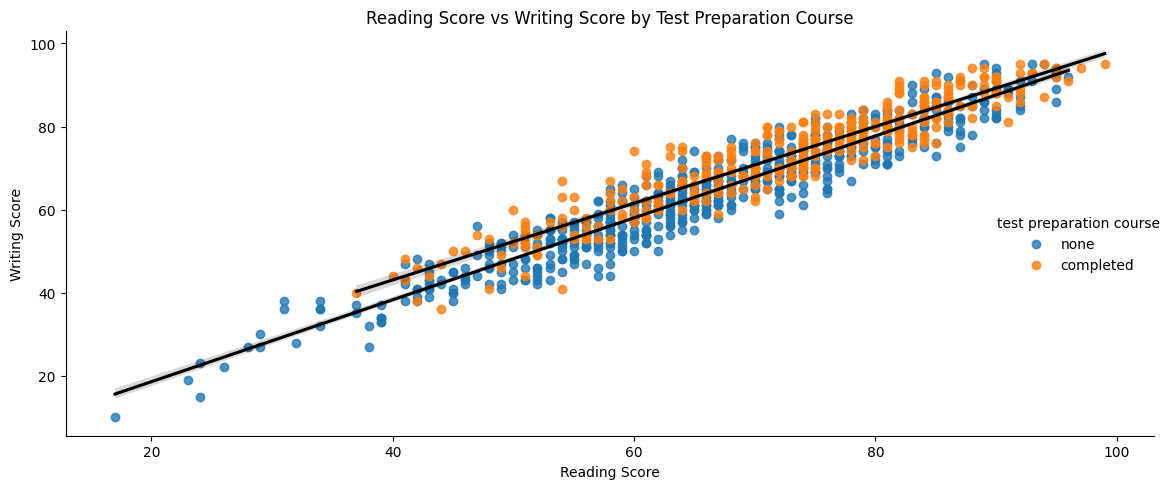

In [64]:
sns.lmplot(
    x='reading score',
    y='writing score',
    hue='test preparation course',
    data=df,
    height=5,
    aspect=2,
    line_kws={"color": "black"})
plt.title('Reading Score vs Writing Score by Test Preparation Course')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.tight_layout()
plt.show()

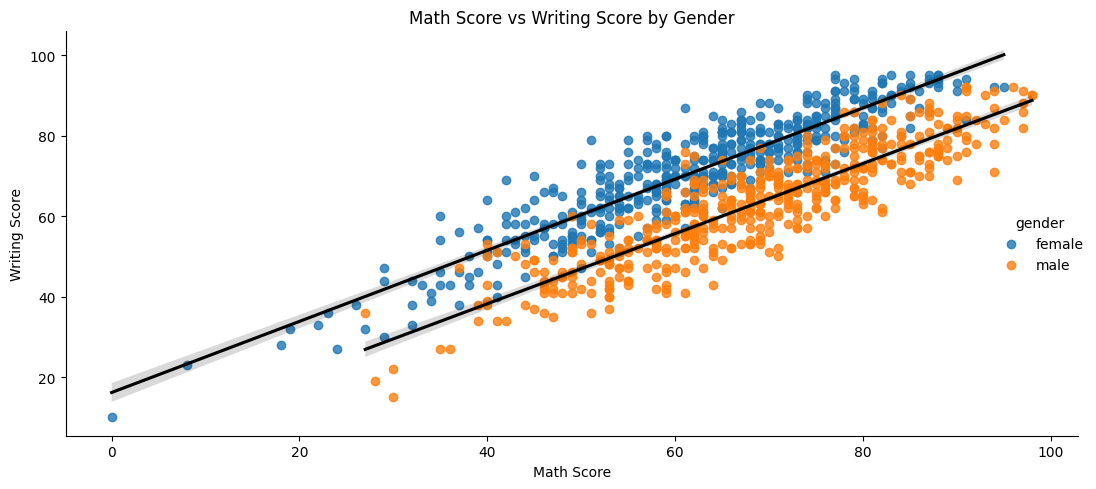

In [74]:
sns.lmplot(x='math score', y='writing score', hue='gender', data=df, height=5, aspect=2, line_kws={"color": "black"})
plt.title('Math Score vs Writing Score by Gender')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.tight_layout()
plt.show()


In [78]:
num= df.select_dtypes(include='number')
num

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [79]:
correlation=num.corr()
correlation

,math score,reading score,writing score
math score,1.000000,0.797777,0.783099
reading score,0.797777,1.000000,0.949618
writing score,0.783099,0.949618,1.000000


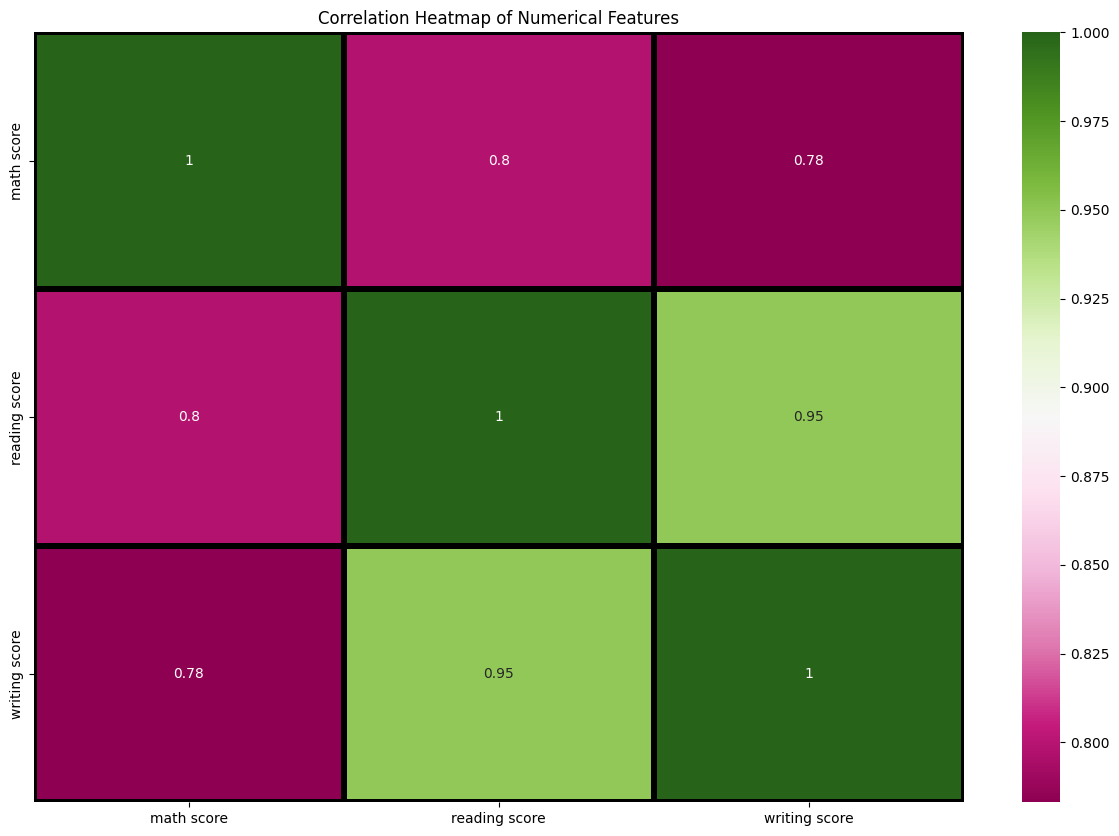

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(num.corr(), annot=True, linewidths=4, linecolor="k", cmap='PiYG')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()